In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [102]:
ais = pd.read_csv('../../../../ais_data/AIS_2021_01_01.csv')

In [103]:
ais.shape

(6624812, 17)

In [104]:
df = ais[['LON', 'LAT']].head(700)
df.head()

,LON,LAT
0,-79.27309,33.18979
1,-97.46591,27.81788
2,-88.04354,30.70844
3,-81.29914,29.90894
4,-97.38891,27.79628


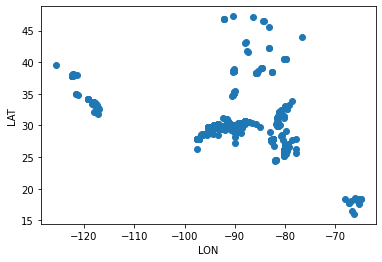

In [105]:
plt.xlabel('LON')
plt.ylabel('LAT')
plt.scatter(df.LON, df.LAT)

In [106]:
df = StandardScaler().fit_transform(df)
df

array([[ 1.1271976 ,  0.73674225],
       [-0.64275761, -0.5834914 ],
       [ 0.27393221,  0.12691041],
       ...,
       [ 1.06341418,  0.64948298],
       [-0.36196306, -0.21060516],
       [-0.13927222,  0.24446036]])

In [107]:
df = pd.DataFrame(df, columns=['LON', 'LAT'])
df.head()

,LON,LAT
0,1.127198,0.736742
1,-0.642758,-0.583491
2,0.273932,0.126910
3,0.930086,-0.069580
4,-0.635266,-0.588800


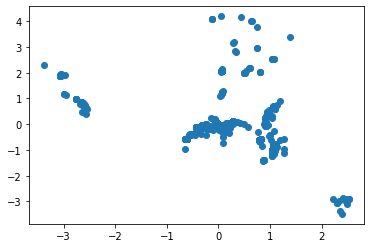

In [108]:
plt.scatter(df.LON, df.LAT)

In [109]:
db = DBSCAN(eps=0.5, min_samples=10).fit(df)

In [110]:
df['cluster'] = db.labels_
df.head()

,LON,LAT,cluster
0,1.127198,0.736742,0
1,-0.642758,-0.583491,0
2,0.273932,0.126910,0
3,0.930086,-0.069580,0
4,-0.635266,-0.588800,0


In [111]:
df.groupby('cluster')

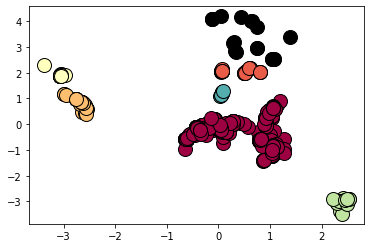

In [112]:
unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    cluster = df[df.cluster==k]

    plt.plot(cluster.LON, cluster.LAT, 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
